In [13]:
# import numpy package for arrays and stuff
import numpy as np
from sklearn.model_selection import train_test_split

# import matplotlib.pyplot for plotting our result
import matplotlib.pyplot as plt

# import pandas for importing csv files
import pandas as pd

In [15]:
# import dataset
dataset = pd.read_excel('dataModel.xlsx')
# print the dataset
print(dataset)


              Airline Airline Type     Region  Year  \
0     AirTran Airways        Other   Domestic  1995   
1     AirTran Airways        Other   Domestic  1996   
2     AirTran Airways        Other   Domestic  1997   
3     AirTran Airways        Other   Domestic  1998   
4     AirTran Airways        Other   Domestic  1999   
...               ...          ...        ...   ...   
1411       US Airways        Other      Total  2011   
1412       US Airways        Other      Total  2012   
1413       US Airways        Other      Total  2013   
1414       US Airways        Other      Total  2014   
1415       US Airways        Other      Total  2015   

      Aircraft Expense Percentage  ASM Percentage  \
0                             0.0             1.0   
1                             0.0             1.0   
2                             0.0             1.0   
3                             1.0             1.0   
4                             1.0             1.0   
...                  

In [16]:
# select all rows by : and column 1
# by 1:2 representing features
X = dataset[['Airline','Airline Type','Region','Aircraft Expense Percentage','ASM Percentage',
             'CASM Aircraft Operations - Expenses / ASM','Pax Rev Percentage','RASM - Pax Revenue / ASM',
             'RPM Percentage','Sum of Aircraft Expense','Sum of ASM','Sum of Pax Rev','Sum of RPM',
             'Yield - Pax Revenue / RPM']]
# print X
X


,Airline,Airline Type,Region,Aircraft Expense Percentage,ASM Percentage,CASM Aircraft Operations - Expenses / ASM,Pax Rev Percentage,RASM - Pax Revenue / ASM,RPM Percentage,Sum of Aircraft Expense,Sum of ASM,Sum of Pax Rev,Sum of RPM,Yield - Pax Revenue / RPM
0,AirTran Airways,Other,Domestic,0.0,1.0,0.000000,0.0,0.000000,1.0,0.00,114722000,0.00,59282000,0.000000
1,AirTran Airways,Other,Domestic,0.0,1.0,0.000000,0.0,0.000000,1.0,0.00,1467192000,0.00,934265000,0.000000
2,AirTran Airways,Other,Domestic,0.0,1.0,0.000000,1.0,0.071849,1.0,0.00,1412731000,101502.94,931120000,0.109012
3,AirTran Airways,Other,Domestic,1.0,1.0,0.033404,1.0,0.074778,1.0,153794.65,4604090000,344285.94,2652028000,0.129820
4,AirTran Airways,Other,Domestic,1.0,1.0,0.043116,1.0,0.083696,1.0,250612.90,5812531000,486487.16,3587907000,0.135591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,US Airways,Other,Total,0.0,0.0,0.081679,0.0,0.115185,0.0,5929723.48,72597944496,8362201.75,60774184366,0.137595
1412,US Airways,Other,Total,0.0,0.0,0.081352,0.0,0.119141,0.0,6036690.06,74204276983,8840780.17,62429604698,0.141612
1413,US Airways,Other,Total,0.0,0.0,0.077708,0.0,0.122108,0.0,6052748.26,77890881718,9511090.08,66159811488,0.143759
1414,US Airways,Other,Total,0.0,0.0,0.076564,0.0,0.124604,0.0,6118420.96,79912567417,9957443.61,66301395090,0.150185


In [17]:
# select all rows by : and column 2
# by 2 to Y representing labels
y = dataset['Load Factor']
y

0       0.516745
1       0.636771
2       0.659092
3       0.576016
4       0.617271
          ...   
1411    0.837134
1412    0.841321
1413    0.849391
1414    0.829674
1415    0.830751
Name: Load Factor, Length: 1416, dtype: float64

In [18]:
#identify categorical variable
def cat_var_checker(df, dtype='object'):
    """
    The categorical variable checker

    Parameters
    ----------
    df : the dataframe
    dtype : the data type categorical variables should have, 'object' by default
            i.e., if a variable has this data type, it should be a categorical variable
    
    Returns
    ----------
    The dataframe of categorical variables and their number of unique value
    """
    
    # Get the dataframe of categorical variables and their number of unique value
    df_cat = pd.DataFrame([[var, df[var].nunique(dropna=False)]
                           # If the data type is dtype
                           for var in df.columns if df[var].dtype == dtype],
                          columns=['var', 'nunique'])
    
    # Sort df_cat in accending order of the number of unique value
    df_cat = df_cat.sort_values(by='nunique', ascending=False).reset_index(drop=True)
    
    return df_cat

In [19]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(X)

# Print the dataframe
df_cat

,var,nunique
0,Airline,15
1,Region,6
2,Airline Type,4


In [20]:
# One-hot-encode the categorical features in the combined data
X = pd.get_dummies(X, columns=np.setdiff1d(np.intersect1d(X.columns, df_cat['var']), ['Load Factor']))

# Print the first 5 rows of df
X.head()

,Aircraft Expense Percentage,ASM Percentage,CASM Aircraft Operations - Expenses / ASM,Pax Rev Percentage,RASM - Pax Revenue / ASM,RPM Percentage,Sum of Aircraft Expense,Sum of ASM,Sum of Pax Rev,Sum of RPM,...,Airline Type_Network Carriers,Airline Type_Other,Airline Type_Ultra-Low-Cost Carriers,Airline Type_Value Carriers,Region_ Atlantic,Region_ Domestic,Region_ International,Region_ Latin America,Region_ Pacific,Region_ Total
0,0.0,1.0,0.000000,0.0,0.000000,1.0,0.00,114722000,0.00,59282000,...,0,1,0,0,0,1,0,0,0,0
1,0.0,1.0,0.000000,0.0,0.000000,1.0,0.00,1467192000,0.00,934265000,...,0,1,0,0,0,1,0,0,0,0
2,0.0,1.0,0.000000,1.0,0.071849,1.0,0.00,1412731000,101502.94,931120000,...,0,1,0,0,0,1,0,0,0,0
3,1.0,1.0,0.033404,1.0,0.074778,1.0,153794.65,4604090000,344285.94,2652028000,...,0,1,0,0,0,1,0,0,0,0
4,1.0,1.0,0.043116,1.0,0.083696,1.0,250612.90,5812531000,486487.16,3587907000,...,0,1,0,0,0,1,0,0,0,0


In [21]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
X_test

,Aircraft Expense Percentage,ASM Percentage,CASM Aircraft Operations - Expenses / ASM,Pax Rev Percentage,RASM - Pax Revenue / ASM,RPM Percentage,Sum of Aircraft Expense,Sum of ASM,Sum of Pax Rev,Sum of RPM,...,Airline Type_Network Carriers,Airline Type_Other,Airline Type_Ultra-Low-Cost Carriers,Airline Type_Value Carriers,Region_ Atlantic,Region_ Domestic,Region_ International,Region_ Latin America,Region_ Pacific,Region_ Total
812,0.074261,0.067997,0.069125,0.069115,0.100592,0.052561,37852.67,547593992,55083.55,365770192,...,0,0,0,1,0,0,0,0,1,0
916,0.000000,0.000000,0.076332,0.000000,0.113466,0.000000,3060534.77,40095013950,4549403.44,33576988799,...,0,0,0,1,0,0,0,0,0,1
339,0.129049,0.136337,0.048812,0.146275,0.089812,0.129009,1146231.00,23482659520,2109035.00,15710855986,...,1,0,0,0,0,0,0,1,0,0
192,0.000000,1.000000,0.080603,0.000000,0.086391,0.000000,496461.78,6159377794,532115.40,5601572937,...,0,0,1,0,0,0,0,0,0,1
203,0.959665,0.968215,0.036375,0.976220,0.075789,0.975113,761595.77,20937251000,1586806.19,14940133000,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,0.393844,0.423555,0.059867,0.383210,0.097436,0.431013,2188001.00,36547750221,3561074.00,31473516331,...,0,1,0,0,0,0,1,0,0,0
614,0.028135,0.028280,0.043387,0.022789,0.072202,0.029070,164067.00,3781445000,273029.00,2730559000,...,1,0,0,0,0,0,0,0,1,0
382,0.068428,0.069143,0.076516,0.046363,0.084732,0.068071,1316514.88,17205683706,1457867.66,14489552529,...,1,0,0,0,0,0,0,0,1,0
942,0.620879,0.596031,0.042678,0.674374,0.101577,0.568051,2471269.00,57905462000,5881848.00,40998434000,...,0,1,0,0,0,1,0,0,0,0


In [23]:
from sklearn.linear_model import LinearRegression

# The LinearRegression
lr = LinearRegression()

# Train lr
lr.fit(X_train, y_train)

# Get the prediction on the validation data using lr
y_pred_lr = lr.predict(X_test)

In [24]:
# print the predicted price
print("Predicted Load Factor: % d\n",y_pred_lr)

Predicted Load Factor: % d
 [0.67269264 0.84904663 0.66135413 0.85407683 0.71369559 0.6206915
 0.86946509 0.87294062 0.79802104 0.67269473 0.49250553 0.71900571
 0.7746741  0.71805166 0.80674159 0.85254105 0.72414733 0.85648132
 0.86999745 0.75992966 0.8443109  0.74465775 0.80633631 0.86025939
 0.84053951 0.81489237 0.83399791 0.84565267 0.8150091  0.81378786
 0.74182946 0.59749431 0.8611521  0.76856119 0.73258969 0.75203219
 0.68236392 0.75976107 0.63926913 0.7231093  0.90991432 0.71455053
 0.73882004 0.87610177 0.69596039 0.73113639 0.66793443 0.82536112
 0.60811134 0.88955067 0.72166155 0.77364196 0.78759655 0.6125773
 0.70591862 0.74072917 0.65765597 0.67351862 0.84302433 0.84795097
 0.61775481 0.79197569 0.81255368 0.84924009 0.79853961 0.81727337
 0.59391974 0.74600923 0.76194018 0.69461863 0.8766728  0.64904899
 0.79301065 0.78300907 0.77620249 0.76578845 0.79421505 0.61519507
 0.7841357  0.69715866 0.7870476  0.81236525 0.7282275  0.78688572
 0.76028672 0.84077325 0.56613049 0.

In [25]:
# Mean Squared Error
MSE_lr = np.square(np.subtract(y_test,y_pred_lr)).mean()
print('The MSE of Linear Regression is',MSE_lr)

The MSE of Linear Regression is 0.0008547812701328356


Feature: 0, Score: -0.00681
Feature: 1, Score: 0.01564
Feature: 2, Score: 0.20633
Feature: 3, Score: 0.14733
Feature: 4, Score: 7.88118
Feature: 5, Score: -0.14870
Feature: 6, Score: -0.00000
Feature: 7, Score: -0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: -5.64406
Feature: 11, Score: -0.00047
Feature: 12, Score: -0.00035
Feature: 13, Score: -0.03294
Feature: 14, Score: -0.00380
Feature: 15, Score: -0.00210
Feature: 16, Score: -0.00473
Feature: 17, Score: 0.00193
Feature: 18, Score: 0.02238
Feature: 19, Score: -0.00135
Feature: 20, Score: 0.00063
Feature: 21, Score: 0.00595
Feature: 22, Score: 0.00256
Feature: 23, Score: 0.01403
Feature: 24, Score: 0.00253
Feature: 25, Score: -0.00429
Feature: 26, Score: -0.00445
Feature: 27, Score: -0.00051
Feature: 28, Score: 0.00346
Feature: 29, Score: 0.00150
Feature: 30, Score: 0.00829
Feature: 31, Score: -0.00762
Feature: 32, Score: -0.00043
Feature: 33, Score: -0.00177
Feature: 34, Score: 0.00526
Feature: 35

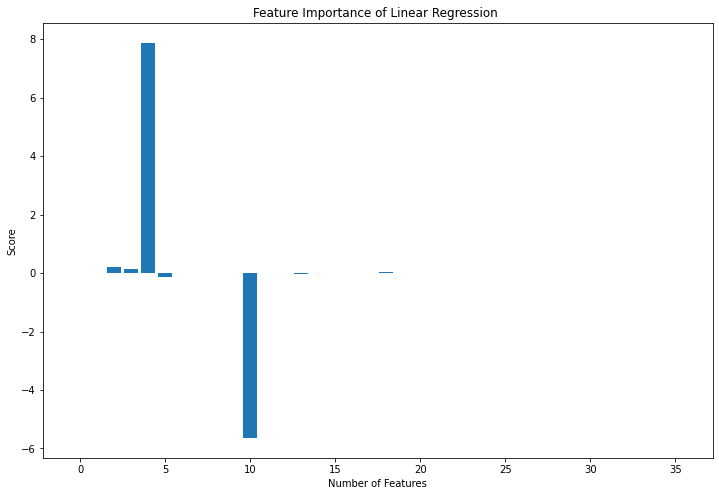

In [26]:

# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
#model = LinearRegression()
# fit the model
#model.fit(X, y)
# get importance
importance = lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Number of Features') 
plt.ylabel('Score') 
plt.title('Feature Importance of Linear Regression ')
plt.show()